# What are the most common programming languages used in Saudi Arabia??

A data analysis using Stackoverflow’s 2018 and 2019 Annual Developer Survey.

<img src="https://onlineustaad.com/wp-content/uploads/2019/04/banner3-1.jpg" />

## Introduction

With the advent of new areas in Saudi Arabia such as Artificial Intelligence and Data Science, many programming languages that were poorly spoken and used are now experiencing a rise in popularity.

For this, we are going to use data from Stackoverflow’s 2018 and 2019 Annual Developer Survey.

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, jobs, code style and various other information.

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSS1mvZ_iIRrWl08VZ-vxCwApQItiV7KX1RTrldjflujvWI2_cb-w'></img>

Every year, Stack Overflow conducts a massive survey of people on it’s website, covering all sorts of information like programming languages, jobs, code style and more.

There were more than 150 questions as a part of the survey, including:

+ **“What frameworks do you work with?”** <br>
+ **“Do you program as a hobby or contribute to open source projects?”** <br>
+ **“What IDE do you work with?”** <br>

In [1]:
# to handle datasets
import numpy as np
import pandas as pd
from collections import Counter

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to make plots
import matplotlib.pyplot as plt
import seaborn as sns

# to change plot style
sns.set(style="darkgrid")

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading Stackoverflow survey data
df_2018 = pd.read_csv('data/developer_survey_2018/survey_results_public.csv')
df_2019 = pd.read_csv('data/developer_survey_2019/survey_results_public.csv')

In [3]:
# Sample 2018 Data
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [4]:
# Sample 2019 Data
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

## 1. What programming languages are most used to work and which programming languages are most required?

In [46]:
def filter_country(df, column_filter, country, columns):
    ''' Filter a dataframe by country.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Filter the dataframe by Saudi Arabia and selecting some columns.
saudiArabia_2018 = filter_country(df_2018, 'Country', 'Saudi Arabia', ['LanguageWorkedWith', 'LanguageDesireNextYear'])
saudiArabia_2019 = filter_country(df_2019, 'Country', 'Saudi Arabia', ['LanguageWorkedWith', 'LanguageDesireNextYear'])

In [47]:
def split_column(df, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series

# Splitting the Data Frame by column into a Series. 
worked_lang_2018 = split_column(saudiArabia_2018, 'LanguageWorkedWith')
wanted_lang_2018 = split_column(saudiArabia_2018, 'LanguageDesireNextYear')

worked_lang_2019 = split_column(saudiArabia_2019, 'LanguageWorkedWith')
wanted_lang_2019 = split_column(saudiArabia_2019, 'LanguageDesireNextYear')

In [48]:
def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

# Flatting nested list objects.
list_worked_languages_2018 = disarray(worked_lang_2018)
list_wanted_languages_2018 = disarray(wanted_lang_2018)

list_worked_languages_2019 = disarray(worked_lang_2019)
list_wanted_languages_2019 = disarray(wanted_lang_2019)

In [49]:
def group_list(data_list, year):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

# Groping a list and creating a dict.
dict_worked_languages_2018 = group_list(list_worked_languages_2018, '2018')
dict_wanted_languages_2018 = group_list(list_wanted_languages_2018, '2018')

dict_worked_languages_2019 = group_list(list_worked_languages_2019, '2019')
dict_wanted_languages_2019 = group_list(list_wanted_languages_2019, '2019')

In [50]:
def create_dataframe(data_dicts):
    ''' Create two dataframes and append them,
        returns a appended dataframe.
    '''
        
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])

    df = df1.append(df2)
    
    return df

# Creating a Data Frame appending the data.
worked_languages = create_dataframe([dict_worked_languages_2018, dict_worked_languages_2019])
wanted_languages = create_dataframe([dict_wanted_languages_2018, dict_wanted_languages_2019])

In [51]:
def percentage(df, column):
    ''' Scale data,
        returns data scaled.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = joined_series.append(i_series)
        
    return joined_series

# Calculating the percentage
worked_languages['Percentage'] = percentage(worked_languages, 'Year')
wanted_languages['Percentage'] = percentage(wanted_languages, 'Year')

In [52]:
# Get the top 10 languages
top_10_worked_lang = worked_languages.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()
top_10_wanted_lang = wanted_languages.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()

worked_lang_chart = worked_languages[worked_languages['Programming Language'].isin(top_10_worked_lang)]
wanted_lang_chart = wanted_languages[wanted_languages['Programming Language'].isin(top_10_worked_lang)]

We can see that  languages like: **HTML/CSS**, **JavaScript**, **SQL**, **Java** and **C#** are still in the top positions. Stack Overflow 2018 survey data and Stack Overflow 2019 survey data

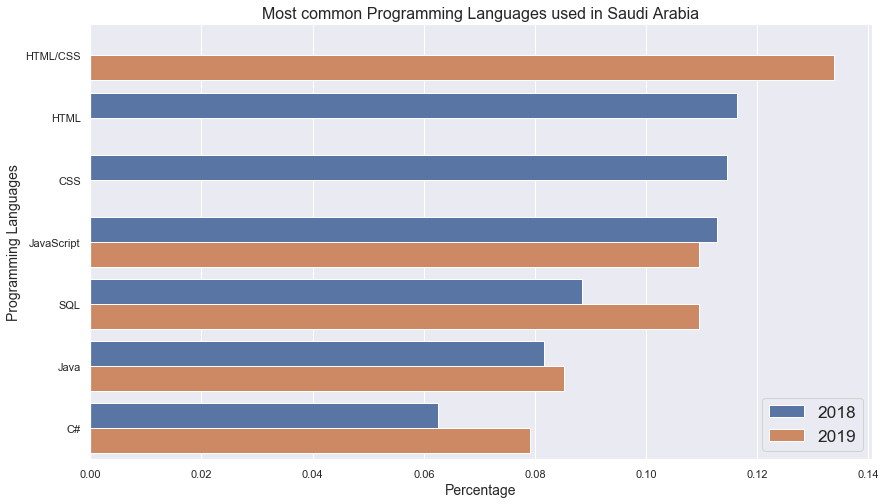

In [55]:
# Figure 1 — Percentage of use of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = worked_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most common Programming Languages used in Saudi Arabia', size = 16)
plt.show()

## Part 2 — What are the most wanted programming languages in Saudi Arabia?

We can see that **JavaScript** have grown tremendously close to other languages. This is probably happening because its’s a programming language that is a lightweight, interpreted, or just-in-time compiled programming language with first-class functions. While it is most well-known as the scripting language for Web pages, many non-browser environments also use it, such as Node.js, Apache CouchDB and Adobe Acrobat..

Most of the programming languages that have appeared as programming languages most used at work, also appeared in the ranking of most wanted programming languages, this show us that are many people wanting to learn these languages.

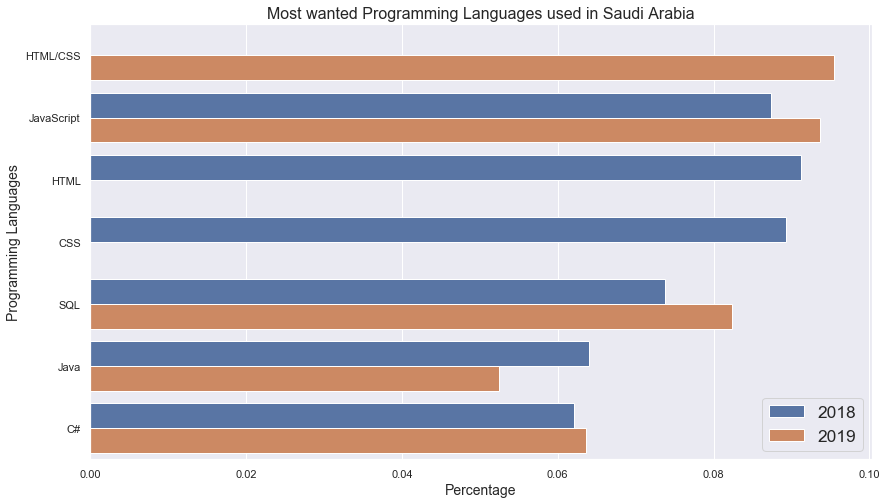

In [56]:
# Figure 2 — Percentage of desire of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = wanted_lang_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most wanted Programming Languages used in Saudi Arabia', size = 16)
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

## Part 3 —How does programming languages used at work relates with programming languages people want to learn?

By looking at the raw data, we can spot some patterns such as for people that use **HTML/CSS** at work. for example, **JavaScript** is also cited as language that those people wanted to learn in the next year.

A natural question arise:

**“The pattern observed for HTML/CSS holds for the other languages?”**

To address this question, we built a heat map that indicate how the work programming languages ​​were related to the desired programming languages. The darker the position gets, the more related the programming language is.

In [57]:
# Grouping data to create a new dataframe

rows = []
for itens in list(zip(worked_lang_2019, wanted_lang_2019)):
    for i in itens[0]:
        rows.append({
            'Worked_PL': i, 
            'Wanted_PL': Counter(itens[0])
        })
        
programming_language_transition = pd.DataFrame(rows).groupby('Worked_PL').agg({'Wanted_PL': 'sum'}).reset_index()

In [58]:
# Creating a matrix

for row in programming_language_transition['Worked_PL']:
    programming_language_transition[row] = 0

for index, row in programming_language_transition.iterrows():
    total = sum([value for key, value in dict(row['Wanted_PL']).items()])
    for key, value in dict(row['Wanted_PL']).items():
         programming_language_transition[key].loc[index] = (value / total)

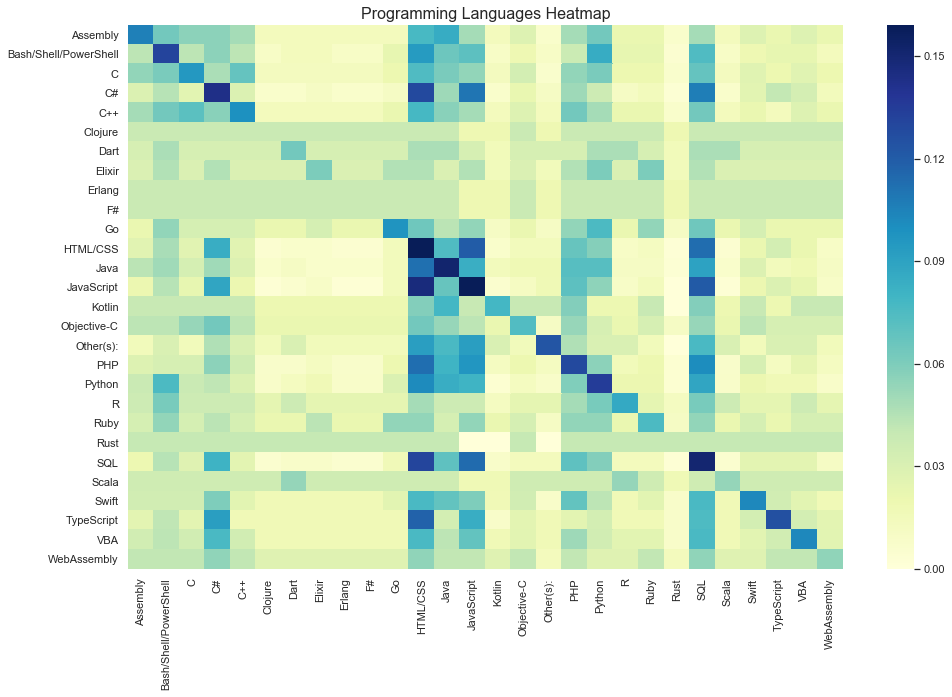

In [59]:
## Figure 3 — Percentage of relationship of work programming languages and desire programming 
## languages in 2018 and 2019.

matrix = programming_language_transition.drop('Wanted_PL', axis=1)\
                                        .set_index('Worked_PL')

plt.figure(figsize=(16, 10))
sns.heatmap(matrix, cmap="YlGnBu")
plt.title('Programming Languages Heatmap', size = 16)
plt.ylabel('')
plt.show()

With this figure we can have two insights:

1. As is evidenced by the diagonal line, people who already work with a programming language have a strong probability of wanting to learn the same programming language.

2. People who work with a programming language of a specific area, tend to want to learn programming languages of the same area. For example: **HTML** is strongly correlated with **CSS** and **JavaScript**.

## Conclusion

In this article, we took a look at what were the most popular and most biased programming languages, according to Stackoverflow’s 2018 and 2019 Annual Developer Survey data.

1. We have seen that some older programming languages such as **HTML/CSS**, **JavaScript**, **SQL**, **Java** and **C#** still dominates.

2. People who already work with a certain programming language have a tendency to learn that language or related languages within correlated areas to improve their own skill.

## References

Stackoverflow Developer Survey Data: [https://insights.stackoverflow.com/survey](https://insights.stackoverflow.com/survey) <br>